In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.model_selection import PredefinedSplit, GridSearchCV
import warnings

In [2]:
#Reads in training dataset (80% of given observations) and scales using StandardScaler
df = pd.read_csv('../data/train_X.csv')
numeric_columns = ['min', 'max', 'mean', 'sd', 'range',
       'sum','duplicates', 'mra_D1_min', 'mra_D1_max', 'mra_D1_mean', 'mra_D1_sd',
       'mra_D1_range', 'mra_D1_zero', 'mra_D2_min', 'mra_D2_max',
       'mra_D2_mean', 'mra_D2_sd', 'mra_D2_range', 'mra_D2_zero', 'mra_D3_min',
       'mra_D3_max', 'mra_D3_mean', 'mra_D3_sd', 'mra_D3_range', 'mra_D3_zero',
       'tri_min', 'tri_max', 'tri_mean', 'tri_sd', 'tri_range', 'var_sill',
       'var_range', 'var_kappa', 'g', 'zeros', 'num_peaks', 'gradient_max', 'gradient_min', 'gradient_mean', 'gradient_stdev',
                  'Trimmed_mean', 'Median', 'Skew', 'SD',
       'Left_mean', 'Left_SD', 'Left_median', 'Left_skew',
       'Right_mean', 'Right_SD', 'Right_median', 'Right_skew']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_columns])

df = pd.concat([
    df[['image_id', 'classification']],
    pd.DataFrame(df_scaled, columns=numeric_columns)
], axis=1)

#Reads in validation dataset (15% of given observations) and scales
df_val = pd.read_csv('../data/validate_X.csv')
df_val = pd.concat([
    df_val[['image_id', 'classification']],
    pd.DataFrame(scaler.transform(df_val[numeric_columns]), columns=numeric_columns)
], axis=1)

#Reads in test dataset (5% of given observations) and scales
df_test = pd.read_csv('../data/test_X.csv')
df_test = pd.concat([
    df_test[['image_id', 'classification']],
    pd.DataFrame(scaler.transform(df_test[numeric_columns]), columns=numeric_columns)
], axis=1)
df

,image_id,classification,min,max,mean,sd,range,sum,duplicates,mra_D1_min,...,Skew,SD,Left_mean,Left_SD,Left_median,Left_skew,Right_mean,Right_SD,Right_median,Right_skew
0,1,high,-0.235309,-0.273585,-0.249757,-0.244137,-0.242619,-0.249757,-0.092816,0.231935,...,1.251054,-0.244137,-0.244366,-0.248084,-0.242703,1.216154,-0.265452,-0.246725,-0.264706,-0.083643
1,2,high,-0.235309,-0.273585,-0.249757,-0.244137,-0.242619,-0.249757,-0.092816,0.231935,...,-0.540150,-0.244092,-0.244376,-0.248024,-0.242713,-0.563995,-0.265452,-0.246675,-0.264706,-0.097259
2,3,high,-0.235309,-0.273585,-0.249757,-0.244137,-0.242619,-0.249757,-0.092816,0.231935,...,0.020468,-0.244102,-0.244365,-0.248026,-0.242703,0.131687,-0.265431,-0.246643,-0.264687,0.624789
3,4,high,-0.235309,-0.273585,-0.249757,-0.244137,-0.242619,-0.249757,-0.092816,0.231935,...,0.021317,-0.244103,-0.244365,-0.248027,-0.242703,0.115957,-0.265431,-0.246624,-0.264686,0.750865
4,5,high,-0.235309,-0.273585,-0.249757,-0.244137,-0.242619,-0.249757,-0.092816,0.231935,...,0.249423,-0.244118,-0.244366,-0.248054,-0.242703,0.432565,-0.265437,-0.246665,-0.264692,1.226158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,706,low,-0.223042,-0.260971,-0.237608,-0.232459,-0.233882,-0.237608,-0.092816,0.226484,...,-0.394149,-0.236994,-0.232201,-0.243047,-0.230574,-0.376331,-0.254196,-0.240827,-0.253426,-1.004191
706,707,low,-0.223121,-0.260998,-0.237614,-0.232451,-0.233808,-0.237614,-0.092816,0.225263,...,-0.439211,-0.233194,-0.230814,-0.234543,-0.228901,-0.563781,-0.252635,-0.237841,-0.251966,0.379353
707,708,low,-0.223179,-0.261061,-0.237629,-0.232542,-0.233857,-0.237629,-0.092816,0.225791,...,-0.481930,-0.230728,-0.232099,-0.236020,-0.230345,-0.530996,-0.253052,-0.234450,-0.252242,-0.837254
708,709,low,-0.223129,-0.260764,-0.237616,-0.232654,-0.233239,-0.237616,-0.092816,0.225878,...,-0.673420,-0.243791,-0.244133,-0.247739,-0.242471,-0.480372,-0.265168,-0.246415,-0.264420,-2.278212


In [3]:
#Performs manual feature selection by dropping some variables from each set
dropped_columns = ['tri_min', 'tri_max', 'tri_mean', 'tri_sd', 'tri_range',
       'var_sill', 'var_range', 'var_kappa','image_id','classification','sum','duplicates','zeros','min','max','range','sd','mean', 'mra_D1_zero', 'mra_D2_mean', 'mra_D2_sd', 'mra_D2_range', 'mra_D3_max', 'mra_D3_mean', 'mra_D3_sd',  'mra_D3_range', 'mra_D3_zero',   'gradient_min']

#Creates X and y for training, testing, and validation sets. 
X_train = df.drop(dropped_columns,axis=1)
y_train = df['classification']
X_val = df_val.drop(dropped_columns,axis=1)
y_val = df_val['classification']
X_test = df_test.drop(dropped_columns,axis=1)
y_test = df_test['classification']

In [4]:
#Creates an index list to be used so that gridsearchcv differentiates between existing training and validation sets
split_index = [-1]*len(X_train) + [0]*len(X_val)
ps = PredefinedSplit(test_fold = split_index)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)

############################ Random Forest Hyperparameter Search ############################################
#Initializes a random forest model
rf = RandomForestClassifier()
#Creates lists of possible parameters to try for the random forest
rf_params = {
 'max_depth': [10, 50, 100],
 'random_state':[0],
 'n_estimators': [200, 1000, 2000]
}

#Performs a grid search over the given parameters using F1 score as a metric.
clf_rf = GridSearchCV(estimator = rf, cv=ps,scoring = "f1_weighted", param_grid=rf_params)
clf_rf.fit(X, y)
print("Best Random Forest Score:", clf_rf.best_score_)
print("Best Random Forest Params:", clf_rf.best_params_)

#Displays the features in order of importance for the Random Forest model
print("\nRandom Forest Feature importances:")
#Creates a new RF model that is not a gridsearchcv object so that feature importances can be calculated
clf_rf_features = RandomForestClassifier(max_depth = clf_rf.best_params_["max_depth"], n_estimators = clf_rf.best_params_["n_estimators"], random_state = 0)
clf_rf_features.fit(X,y)
#Calculates and displays feature importances
zipped_lists = zip(clf_rf_features.feature_importances_, X_train.columns)
sorted_pairs = sorted(zipped_lists, reverse=True)
for pair in sorted_pairs:
    print(f"{round(pair[0], 2)} {pair[1]}")

############################ Logistic Regression Hyperparamter Search #######################################
warnings.filterwarnings("ignore")
#Initializes a logistic regression model
lr = LogisticRegression()
#Creates lists of possible parameters to try for the logistic regression
lr_params = {
    "C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4],
    "random_state": [0],
    "max_iter": [1000]
}
#Perfoms grid search over the given parameters using F1 score as a metric
clf_lr = GridSearchCV(estimator = lr, cv=ps,scoring = "f1_weighted", param_grid=lr_params)
clf_lr.fit(X, y)
print()
print('Logistic Regression Coefficients: ')
j = 1
for i in clf_lr.best_estimator_.coef_:
    print()
    print('Class: ',j)
    j+=1
    zipped_lists = zip([abs(ele) for ele in i], X_train.columns)
    sorted_pairs = sorted(zipped_lists, reverse=True)
    for pair in sorted_pairs:
        print(f"{round(pair[0], 2)} {pair[1]}")
clf_lr.best_estimator_.coef_
print("Best Logistic Regression Score:", clf_lr.best_score_)
print("Best Logistic Regression Params:", clf_lr.best_params_)

############################ K Nearest Neighbors Hyperparamter Search #######################################
#Initializes a KNN model
knn = KNeighborsClassifier()
#Creates a list of n_neighbors parameter values to try
knn_params = {
    "n_neighbors": [i for i in range(1,20,1)]
}
#Performs grid search over given parameters using F1 score as a metric
clf_knn = GridSearchCV(estimator = knn, cv=ps, scoring = "f1_weighted", param_grid=knn_params)
clf_knn.fit(X, y)
print("Best KNN Classifier Score:", clf_knn.best_score_)
print("Best KNN Classifier Params:", clf_knn.best_params_)

############################ Support Vector Machine Hyperparamter Search #######################################
#Initializes a SVM classifier model
svm_mod = svm.SVC()
#Creates a list of C parameters to try
svm_params = {
    "C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4],
    "random_state": [0]
}
#Performs grid search over given list of C parameters
clf_svm = GridSearchCV(estimator = svm_mod, cv=ps,scoring = "f1_weighted", param_grid=svm_params)
clf_svm.fit(X, y)
print("Best SVM Score:", clf_svm.best_score_)
print("Best SVM Params:", clf_svm.best_params_)

Best Random Forest Score: 0.8186015918472817
Best Random Forest Params: {'max_depth': 10, 'n_estimators': 2000, 'random_state': 0}

Random Forest Feature importances:
0.2 g
0.09 Left_median
0.08 Median
0.06 Left_mean
0.05 Trimmed_mean
0.05 gradient_max
0.05 gradient_stdev
0.05 Right_skew
0.04 Skew
0.03 gradient_mean
0.03 mra_D1_max
0.03 mra_D1_range
0.03 Right_mean
0.03 Right_median
0.02 mra_D2_max
0.02 mra_D1_sd
0.02 mra_D1_min
0.02 mra_D3_min
0.02 mra_D2_min
0.02 num_peaks
0.02 SD
0.02 Left_skew
0.01 Right_SD
0.01 Left_SD
0.01 mra_D1_mean
0.01 mra_D2_zero

Logistic Regression Coefficients: 

Class:  1
142.93 gradient_max
119.36 Median
102.42 Left_median
96.66 gradient_stdev
89.35 Trimmed_mean
47.55 Right_SD
46.57 Left_mean
43.09 Right_mean
41.71 Right_median
39.61 SD
30.65 Left_SD
24.5 mra_D2_min
18.14 mra_D1_max
18.0 gradient_mean
17.05 mra_D1_min
14.5 mra_D3_min
7.95 mra_D1_sd
5.3 g
4.71 Skew
3.46 mra_D2_max
2.37 mra_D1_range
1.39 mra_D2_zero
0.77 Right_skew
0.73 Left_skew
0.39 mra

In [5]:
#Uses test set to assess final test error of tuned model
print(f"RF Test F1: {round(clf_rf.score(X_test, y_test), 3)}")
print(f"LR Test F1: {round(clf_lr.score(X_test, y_test), 3)}")
print(f"KNN Test F1: {round(clf_knn.score(X_test, y_test), 3)}")
print(f"SVM Test F1: {round(clf_svm.score(X_test, y_test), 3)}")

RF Test F1: 0.964
LR Test F1: 0.942
KNN Test F1: 0.798
SVM Test F1: 0.86


In [6]:
#Prints confusion a confusion matrix for each model
cm_rf = confusion_matrix(y_test, clf_rf.predict(X_test))
cm_lr = confusion_matrix(y_test, clf_lr.predict(X_test))
cm_knn = confusion_matrix(y_test, clf_knn.predict(X_test))
cm_svm = confusion_matrix(y_test, clf_svm.predict(X_test))

print(cm_rf)
print(cm_lr)
print(cm_knn)
print(cm_svm)

[[69  0  0]
 [ 0 20  0]
 [ 0  5 41]]
[[66  0  3]
 [ 0 19  1]
 [ 0  4 42]]
[[65  0  4]
 [ 0 18  2]
 [12  8 26]]
[[67  0  2]
 [ 0 20  0]
 [11  5 30]]


In [7]:
#Prints percent of correct predictions for each model based on confusion matrices
cm_rf
print("RF % Correct:",np.trace(cm_rf) / np.sum(cm_rf).astype('float'))
print("LR % Correct:",np.trace(cm_lr) / np.sum(cm_lr).astype('float'))
print("KNN % Correct:",np.trace(cm_knn) / np.sum(cm_knn).astype('float'))
print("SVM % Correct:",np.trace(cm_svm) / np.sum(cm_svm).astype('float'))

RF % Correct: 0.9629629629629629
LR % Correct: 0.9407407407407408
KNN % Correct: 0.8074074074074075
SVM % Correct: 0.8666666666666667


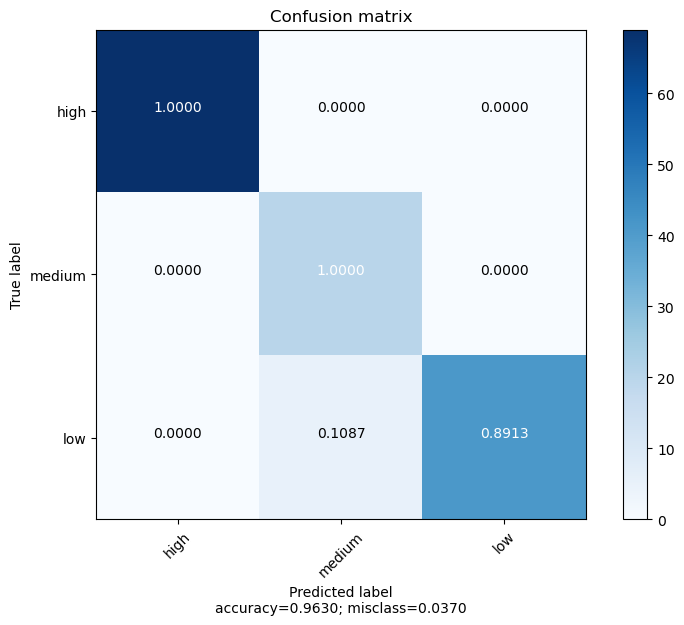

In [8]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph
  Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(confusion_matrix(y_test, clf_rf.predict(X_test)),['high','medium','low'])

In [9]:
final_test_x = pd.read_csv('../data/final_test_X.csv')

In [10]:
variable = final_test_x['variable']
final_test_x = pd.concat([
    final_test_x[['image_id']],
    pd.DataFrame(scaler.transform(final_test_x[numeric_columns]), columns=numeric_columns)
], axis=1)

image_id = final_test_x['image_id']

dropped_columns_final = dropped_columns
dropped_columns_final.remove('classification')
final_test_x = final_test_x.drop(dropped_columns_final,axis=1)

final_predictions = pd.DataFrame(clf_lr.predict(final_test_x),columns=['pred'])
final_predictions['variable'] = variable
final_predictions.to_csv('../data/final_predictions.csv')

In [11]:
final_predictions.head()

,pred,variable
0,high,dst_a3_SRF_daily_5
1,high,V850_daily_9
2,low,TREFHTMX_monthly_5
3,high,BURDENSOA_monthly_9
4,med,TSMN_monthly_1


In [12]:
clf_lr?

Type:        GridSearchCV
String form:
GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
           estimator=L <...>                     'max_iter': [1000], 'random_state': [0]},
           scoring='f1_weighted')
File:        ~/miniconda3/envs/gds/lib/python3.7/site-packages/sklearn/model_selection/_search.py
Docstring:  
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator 